[adaptado de [Programa de cursos integrados Aprendizado de máquina](https://www.coursera.org/specializations/machine-learning-introduction) de [Andrew Ng](https://www.coursera.org/instructor/andrewng)  ([Stanford University](http://online.stanford.edu/), [DeepLearning.AI](https://www.deeplearning.ai/) ) ]

# Descida de Gradiente para Regressão Linear

<figure>
    <center> <img src="./images/C1_W1_L4_S1_Lecture_GD.png"  style="width:800px;height:200px;" ></center>
</figure>

## Objetivos
Neste laboratório, você irá:
- automatizar o processo de otimização de $w$ e $b$ usando a descida de gradiente.

## Ferramentas
Neste laboratório, usaremos: 
- NumPy, uma biblioteca popular para computação científica
- Matplotlib, uma biblioteca popular para plotagem de dados
- rotinas de plotagem no arquivo lab_utils.py no diretório local

In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

<a name="toc_40291_2"></a>
# Definição do problema

Vamos usar os mesmos dois pontos de dados de antes - uma casa com 1.000 pés quadrados vendida por \$300.000 e uma casa com 2.000 pés quadrados vendida por \$500.000.

| Tamanho (1000 sqft)     | Preço (1000s de dólares) |
| ----------------| ------------------------ |
| 1               | 300                      |
| 2               | 500                      |


In [2]:
# Carregar nosso conjunto de dados
x_train = np.array([1.0, 2.0])   #características
y_train = np.array([300.0, 500.0])   #valores alvo

<a name="toc_40291_2.0.1"></a>
### Calcular o custo
Isso foi desenvolvido no último laboratório. Precisaremos dele novamente aqui.

In [3]:
#Função para calcular o custo
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

<a name="toc_40291_2.1"></a>
## Resumo da descida de gradiente
Até agora, neste curso, você desenvolveu um modelo linear que prevê $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
Na regressão linear, você utiliza dados de treinamento de entrada para ajustar os parâmetros $w$,$b$ minimizando uma medida do erro entre nossas previsões $f_{w,b}(x^{(i)})$ e os dados reais $y^{(i)}$. A medida é chamada de $cost$, $J(w,b)$. No treinamento, você mede o custo de todas as nossas amostras de treinamento $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$

Na aula teórica, o *gradiente descendente* foi descrito como:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
em que os parâmetros $w$ e $b$ são atualizados simultaneamente.  
O gradiente é definido como:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w} &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b} &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\\
\end{align}
$$

Aqui, *simultaneamente* significa que você calcula as derivadas parciais de todos os parâmetros antes de atualizar qualquer um deles.

<a name="toc_40291_2.2"></a>
## Implementar a descida de gradiente
Você implementará o algoritmo de gradiente descendente para uma característica. Você precisará de três funções. 
- `compute_gradient` que implementa as equações (4) e (5) acima
- `compute_cost` que implementa a equação (2) acima (código do laboratório anterior)
- `gradient_descent`, utilizando compute_gradient e compute_cost

Convenções:
- A nomenclatura das variáveis python que contêm derivadas parciais segue este padrão, $\frac{\partial J(w,b)}{\partial b}$ será `dj_db`.
- w.r.t é _With Respect To_ (com relação a), como em derivada parcial de $J(wb)$ With Respect To $b$.



<a name="toc_40291_2.3"></a>
### Calcular o gradiente
<a name='ex-01'></a>
`compute_gradient`  implementa (4) e (5) acima e retorna $\frac{\partial J(w,b)}{\partial w}$,$\frac{\partial J(w,b)}{\partial b}$.

In [4]:
def compute_gradient(x, y, w, b): 
    """
    Calcula o gradiente para a regressão linear
    Args:
      x (ndarray (m,)): Dados, m exemplos
      y (ndarray (m,)): valores alvo
      w,b (scalar)    : parâmetros do modelo
    Returns
      dj_dw (scalar): O gradiente do custo w.r.t. aos parâmetros w
      dj_db (scalar): O gradiente do custo w.r.t. aos parâmetros b     
     """
    
    # Quantidade de exemplos de treino
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

<br/>

<img align="left" src="./images/C1_W1_Lab03_lecture_slopes.PNG"   style="width:340px;" > 
As aulas teóricas descreveram como a descida de gradiente utiliza a derivada parcial do custo em relação a um parâmetro em um ponto para atualizar esse parâmetro.   
Vamos usar nossa função `compute_gradient` para encontrar e plotar algumas derivadas parciais de nossa função de custo em relação a um dos parâmetros, $w_0$.

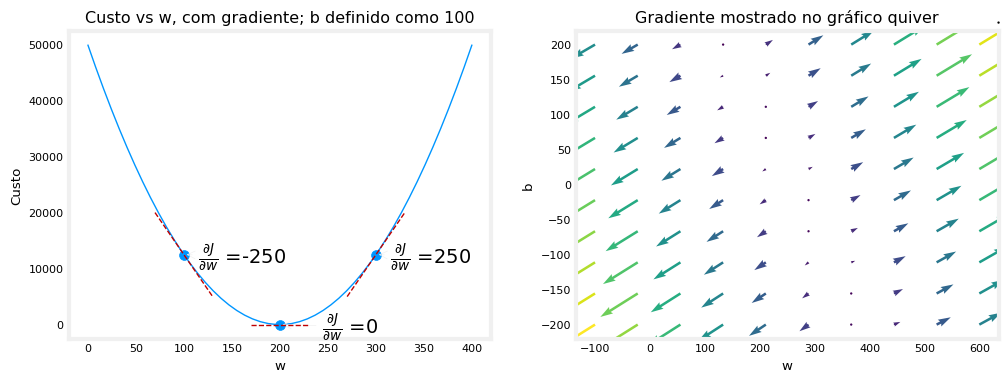

In [5]:
plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()

Acima, o gráfico da esquerda mostra $\frac{\partial J(w,b)}{\partial w}$ ou a inclinação da curva de custo em relação a $w$ em três pontos. No lado direito do gráfico, a derivada é positiva, enquanto no lado esquerdo é negativa. Devido ao "formato de tigela", as derivadas sempre conduzirão a descida do gradiente em direção à parte inferior, onde o gradiente é zero.
 
O gráfico da esquerda fixou $b=100$. A descida do gradiente utilizará tanto $\frac{\partial J(w,b)}{\partial w}$ quanto $\frac{\partial J(w,b)}{\partial b}$ para atualizar os parâmetros.

O "gráfico de quiver" à direita fornece um meio de visualizar o gradiente de ambos os parâmetros. Os tamanhos das setas refletem a magnitude do gradiente naquele ponto. A direção e a inclinação da seta refletem a proporção de $\frac{\partial J(w,b)}{\partial w}$ e $\frac{\partial J(w,b)}{\partial b}$ nesse ponto.

Observe que o gradiente aponta *para longe* do mínimo. Reveja a equação (3) acima. O gradiente em escala é *subtraído* do valor atual de $w$ ou $b$. Isso move o parâmetro em uma direção que reduzirá o custo.

<a name="toc_40291_2.5"></a>
### Descida de gradiente
Agora que os gradientes podem ser calculados, a descida do gradiente, descrita na equação (3) acima, pode ser implementada abaixo em `gradient_descent`. Os detalhes da implementação estão descritos nos comentários. A seguir, você utilizará essa função para encontrar os valores ideais de $w$ e $b$ nos dados de treinamento.

In [6]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Executa a descida do gradiente para ajustar w,b. Atualiza w,b executando 
    etapas de gradiente num_iters com taxa de aprendizado alfa    
    
    Args:
      x (ndarray (m,))  : DAdos, m exemplos 
      y (ndarray (m,))  : valores alvo
      w_in,b_in (scalar): valores iniciais dos parâmetros do modelo
      alpha (float):     taxa de aprendizado
      num_iters (int):   quantidade de iterações para executar o gradiente descendente
      cost_function:     função que retorna o custo produzido
      gradient_function: função que retorna o gradiente produzido
      
    Returns:
      w (scalar): Valores atualizados do parâmetros após executar o gradiente descendente
      b (scalar): Valores atualizados do parâmetros após executar o gradiente descendente
      J_history (List): Histórico de valores de custo
      p_history (list): Histórico dos parâmetros [w,b] 
      """
    
    # Uma matriz para armazenar os custos J e w em cada iteração, principalmente para gráficos posteriores    
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calcule o gradiente e atualize os parâmetros usando gradient_function        
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Atualize os parâmetros usando a equação (3) acima
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Salve o custo J a cada iteração
        if i<100000:      # evitar o esgotamento de recursos
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Imprimir o custo a cada intervalo de 10 vezes ou tantas iterações se < 10            
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteração {i:4}: Custo {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #retornar w e histórico de J,w  para gráficos

In [7]:
# Inicializar parâmetros
w_init = 0
b_init = 0
# Algumas configurações do gradiente descendente
iterations = 10000
tmp_alpha = 1.0e-2
# executar o gradiente descendente
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) encontrado pelo gradiente descendente: ({w_final:8.4f},{b_final:8.4f})")

Iteração    0: Custo 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteração 1000: Custo 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteração 2000: Custo 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteração 3000: Custo 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteração 4000: Custo 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteração 5000: Custo 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteração 6000: Custo 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteração 7000: Custo 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteração 8000: Custo 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteração 9000: Custo 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02


<img align="left" src="./images/C1_W1_Lab03_lecture_learningrate.PNG"  style="width:340px; padding: 15px; " > 
Reserve um momento e observe algumas características do processo de descida de gradiente impresso acima.  

- O custo começa grande e diminui rapidamente, conforme descrito no slide da aula teórica.
- As derivadas parciais, `dj_dw` e `dj_db`, também diminuem, rapidamente no início e depois mais lentamente. Conforme mostrado no diagrama da aula, à medida que o processo se aproxima do "fundo da tigela", o progresso é mais lento devido ao valor menor da derivada nesse ponto.
- o progresso fica mais lento, embora a taxa de aprendizado, alfa, permaneça fixa

### Custo versus iterações de descida de gradiente 
Um gráfico de custo versus iterações é uma medida útil do progresso na descida do gradiente. O custo deve sempre diminuir em execuções bem-sucedidas. A mudança no custo é tão rápida no início que é útil plotar a descida inicial em uma escala diferente da descida final. Nos gráficos abaixo, observe a escala de custo nos eixos e a etapa de iteração.

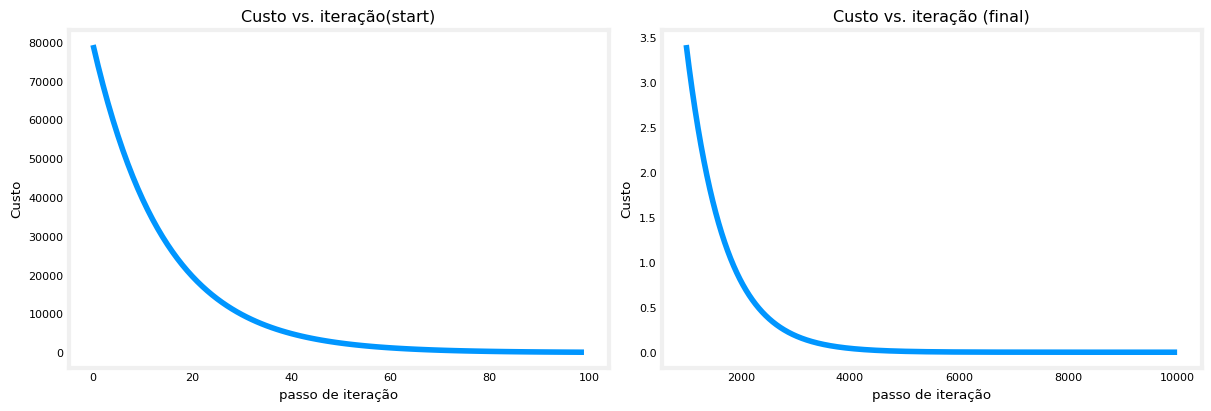

In [8]:
# plotar custo vs iteração
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Custo vs. iteração(start)");  ax2.set_title("Custo vs. iteração (final)")
ax1.set_ylabel('Custo')            ;  ax2.set_ylabel('Custo') 
ax1.set_xlabel('passo de iteração')  ;  ax2.set_xlabel('passo de iteração') 
plt.show()

### Previsões
Agora que você descobriu os valores ideais para os parâmetros $w$ e $b$, pode usar o modelo para prever os valores das casa com base nos parâmetros aprendidos. Como esperado, os valores previstos são praticamente os mesmos que os valores de treinamento para a mesma habitação. Além disso, o valor que não está na previsão está de acordo com o valor esperado.

In [9]:
print(f"predição para casas com 1000 sqft{w_final*1.0 + b_final:0.1f} milhares de dólares")
print(f"predição para casas com 1200 sqft {w_final*1.2 + b_final:0.1f} milhares de dólares")
print(f"predição para casas com 2000 sqft {w_final*2.0 + b_final:0.1f} milhares de dólares")

predição para casas com 1000 sqft300.0 milhares de dólares
predição para casas com 1200 sqft 340.0 milhares de dólares
predição para casas com 2000 sqft 500.0 milhares de dólares


<a name="toc_40291_2.6"></a>
## Plotagem
É possível mostrar o progresso da descida de gradiente durante sua execução plotando o custo ao longo das iterações em um gráfico de contorno do custo(w,b).

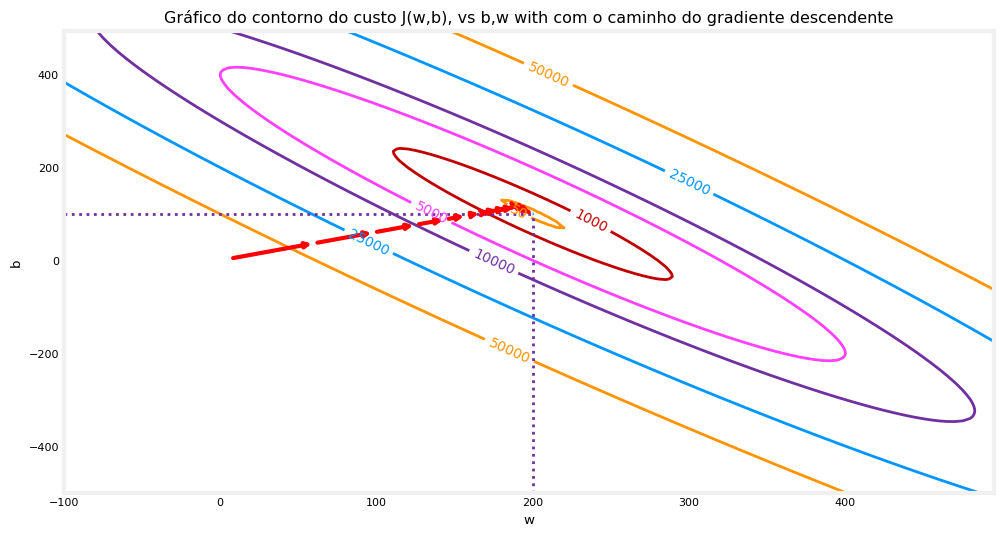

In [10]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, p_hist, ax)

Acima, o gráfico de contorno mostra o $cost(w,b)$ em um intervalo de $w$ e $b$. Os níveis de custo são representados pelos anéis. Sobreposto, usando setas vermelhas, está o caminho da descida do gradiente. Aqui estão alguns aspectos a serem observados:
- O caminho faz um progresso constante (monotônico) em direção ao seu objetivo.
- As etapas iniciais são muito maiores do que as etapas próximas à meta.

Com o **zoom**, podemos ver as etapas finais da descida do gradiente. Observe que a distância entre as etapas diminui à medida que o gradiente se aproxima de zero.

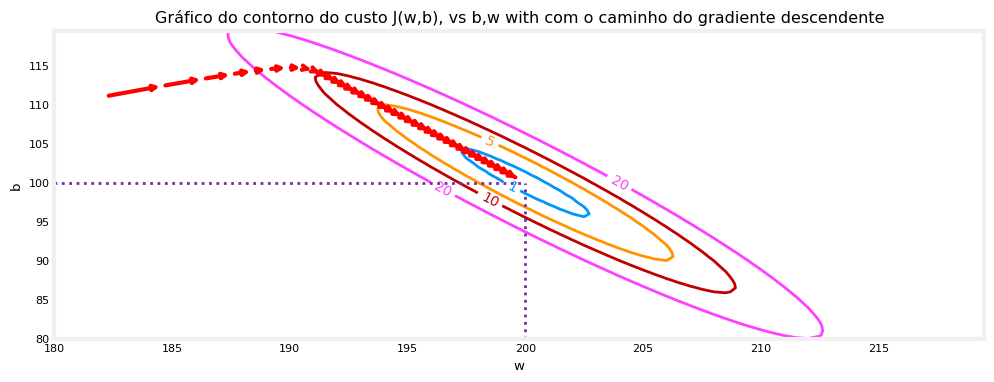

In [11]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, p_hist, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5],
            contours=[1,5,10,20],resolution=0.5)

<a name="toc_40291_2.7.1"></a>
### Taxa de aprendizado aumentado

<figure>
 <img align="left", src="./images/C1_W1_Lab03_alpha_too_big.PNG"   style="width:340px;height:240px;" >
</figure>

Na aula teórica, houve uma discussão relacionada ao valor adequado da taxa de aprendizado, $\alpha$ na equação (3). Quanto maior for $\alpha$, mais rápido o gradiente de descida convergirá para uma solução. Porém, se for muito grande, a descida do gradiente divergirá. Acima, você tem um exemplo de uma solução que converge bem.

Vamos tentar aumentar o valor de $\alpha$ e ver o que acontece:

In [12]:
# inicializar os parâmetros
w_init = 0
b_init = 0
# definir os valores de alfa para um valor alto
iterations = 10
tmp_alpha = 8.0e-1
# executar o gradiente descendente
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)

Iteração    0: Custo 2.58e+05  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  5.200e+02, b: 3.20000e+02
Iteração    1: Custo 7.82e+05  dj_dw:  1.130e+03, dj_db:  7.000e+02   w: -3.840e+02, b:-2.40000e+02
Iteração    2: Custo 2.37e+06  dj_dw: -1.970e+03, dj_db: -1.216e+03   w:  1.192e+03, b: 7.32800e+02
Iteração    3: Custo 7.19e+06  dj_dw:  3.429e+03, dj_db:  2.121e+03   w: -1.551e+03, b:-9.63840e+02
Iteração    4: Custo 2.18e+07  dj_dw: -5.974e+03, dj_db: -3.691e+03   w:  3.228e+03, b: 1.98886e+03
Iteração    5: Custo 6.62e+07  dj_dw:  1.040e+04, dj_db:  6.431e+03   w: -5.095e+03, b:-3.15579e+03
Iteração    6: Custo 2.01e+08  dj_dw: -1.812e+04, dj_db: -1.120e+04   w:  9.402e+03, b: 5.80237e+03
Iteração    7: Custo 6.09e+08  dj_dw:  3.156e+04, dj_db:  1.950e+04   w: -1.584e+04, b:-9.80139e+03
Iteração    8: Custo 1.85e+09  dj_dw: -5.496e+04, dj_db: -3.397e+04   w:  2.813e+04, b: 1.73730e+04
Iteração    9: Custo 5.60e+09  dj_dw:  9.572e+04, dj_db:  5.916e+04   w: -4.845e+04, b:-2.99567e+04


Acima, $w$ e $b$ estão oscilando entre positivo e negativo, com o valor absoluto aumentando a cada iteração. Além disso, a cada iteração, $\frac{\partial J(w,b)}{\partial w}$ muda de sinal e o custo está aumentando em vez de diminuir. Esse é um sinal claro de que a *taxa de aprendizado é muito grande* e a solução está divergindo. 
Vamos visualizar isso com um gráfico.

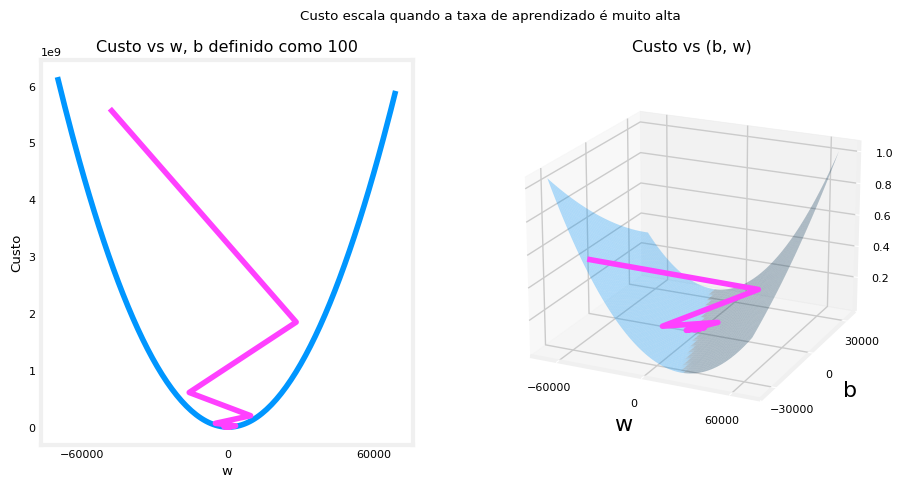

In [13]:
plt_divergence(p_hist, J_hist,x_train, y_train)
plt.show()

Acima, o gráfico à esquerda mostra a progressão de $w$ nas primeiras etapas da descida do gradiente. $w$ oscila de positivo para negativo e o custo cresce rapidamente.

O Gradiente Descendente está operando em $w$ e $b$ simultaneamente, portanto, é necessário o gráfico 3D à direita para obter a imagem completa.

## Parabéns!
Neste laboratório, você:
- se aprofundou nos detalhes da descida de gradiente para uma única variável.
- desenvolveu uma rotina para calcular o gradiente
- visualizou o que é o gradiente
- concluiu uma rotina de descida de gradiente
- utilizou a descida de gradiente para encontrar parâmetros
- examinou o impacto do dimensionamento da taxa de aprendizado